# IMPORT 

In [47]:
import wikipedia
import re
from datetime import datetime
import locale
import matplotlib.pyplot as plt
import pandas as pd

# NOTRE LISTE DE SIGNATAIRE

In [4]:
connards_point_d_interrogation = [
    "Benoit Poelvoorde",
    "Nathalie Baye",
    "Carole Bouquet",
    "Jacques Dutronc", #PROBLEME AVEC SA PAGE WIKI JSP PK ON RAJOUTE APRES
    "Charlotte Rampling",
    "Nadine Trintignant",
    "Yvan Attal",
    "Jacques Weber",
    "Bertrand Blier",
    "Emmanuelle Seigner",
    "Roberto Alagna",
    "Michel Fau",
    "Victoria Mérida Rojas",
    "Dominique Besnehard",
    "Carla Bruni Tedeschi",
    "Pierre Richard",
    "Clémentine Célarié",
    "Gérard Darmon",
    "Rudy Ricciotti",
    "Christophe Barratier",
    "Arielle Dombasle",
    "Francis Veber", #PROBLEME AVEC SA PAGE WIKI JSP PK ON RAJOUTE APRES
    "Patrice Leconte",
    "Fossey Brigitte",
    "Boualem Sansal",
    "Charles Berling",
    "Yannis Ezziadi",  #N'a pas wikipédia
    "Philippe Caubère",
    "Perez Vincent", #EST NE LE JOUR DE MOOOOON ANNIVERSAIRE 
    "Myriam Boyer",
    "Antoine Dulery",
    "Turner Afida",
    "Paulo Branco",
    "Jean-Marie Rouart",
    "Josée Dayan",
    "Joel Seria",
    "Bernard Murat",
    "Serge Toubiana",
    "Catherine Millet", #1er au lieu de 1 j'arrive pas à enlever
    "Jacques Henric",
    "Stéphanie Murat",
    "Marie-France Brière",
    "Daniel Humair",
    "Judith Magre",
    "David Bélugou", #N'a pas de wikipedia qui sont-ils?
    "Marie Beltrami", #N'a pas de wikipedia qui sont-ils?
    "Tanya Lopert",
    "Jean-Claude Dreyfus",
    "Chiara Muti",
    "Jean-Marie Besset",
    "Stéphane Druet",
    "Christine Boisson",
    "Karine Silla-Perez",
    "Myriam Boisaubert", #N'a pas de wikipedia qui sont-ils?
    "Lilian Euzéby", #N'a pas de wikipedia qui sont-ils?
    "Marion Lahmer" #N'a pas de wikipedia qui sont-ils?
]


# NOS FONCTIONS

In [57]:
def calculer_age(date_str):
    # Configurer localement le langage en français
    locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')

    # Remplacer "er" par "" pour le jour
    #date_str = date_str.replace("er", "").strip()

    # Convertir la date donnée en objet datetime
    date_obj = datetime.strptime(date_str, '%d %B %Y')

    # Obtenir la date d'aujourd'hui
    aujourdhui = datetime.now()

    # Calculer la différence en années
    difference = aujourdhui - date_obj
    nombre_annees = difference.days / 365.25  # 365.25 jours par année (pour prendre en compte les années bissextiles)

    return int(nombre_annees)

def obtenir_genre(correspondance):
    if "née" in correspondance.group(0).lower():
        return "feminin"
    else:
        return "masculin"

def extraire_age_genre_nom(con):
    try:
        page = wikipedia.page(con)
        sommaire = str(page.summary)
        motif = r"(née|né)( le)? (\d{1,2} \w+ \d{4})"
        correspondance = re.search(motif, sommaire, re.IGNORECASE)
        
        if correspondance:
            date_naissance = correspondance.group(3)
            age = calculer_age(date_naissance)
            genre = obtenir_genre(correspondance)
            terme_genre = lambda g: "née" if g == "feminin" else "né"
            print(f"{con} {terme_genre(genre)} le {date_naissance} a {age} ans.")
            return (con,age,genre)
        else:
            mots = con.split()
            if len(mots) > 1:
                con_inverse = " ".join([mots[1], mots[0]])
                page = wikipedia.page(con_inverse)
                sommaire = str(page.summary)
                correspondance = re.search(motif, sommaire, re.IGNORECASE)
                
                if correspondance:
                    date_naissance = correspondance.group(3)
                    age = calculer_age(date_naissance)
                    genre = obtenir_genre(correspondance)
                    terme_genre = lambda g: "née" if g == "feminin" else "né"
                    print(f"{con_inverse} {terme_genre(genre)} le {date_naissance} a {age} ans.")
                    return (con,age,genre)
                else:
                    print(f"Format de date non trouvé pour {con} ou {con_inverse}.")
                    return None
            else:
                print(f"Format de nom/prénom non reconnu pour {con}.")
                return None
    except wikipedia.exceptions.WikipediaException as e:
        print(f"Erreur avec Wikipedia pour {con}: {e}")
        return None
    
def alors_ca_donne_quoi(liste):
    L=[]
    for i in liste:
        L.append(extraire_age_genre_nom(i))
    
    return (list(filter(lambda x: x is not None, L)))

def convertir_en_data_fram(L):
    donnees_nettoyees = pd.DataFrame(L, columns=["Personne", "Age", "Sexe"])
    donnees_nettoyees = donnees_nettoyees.dropna()
    donnees_nettoyees["Age"] = pd.to_numeric(donnees_nettoyees["Age"], errors="coerce")
    donnees_nettoyees = donnees_nettoyees.drop_duplicates(subset=["Personne", "Age"])

    return donnees_nettoyees

In [50]:
wikipedia.set_lang("fr")
L=alors_ca_donne_quoi(connards_point_d_interrogation)

Benoit Poelvoorde né le 22 septembre 1964 a 59 ans.
Nathalie Baye née le 6 juillet 1948 a 75 ans.
Carole Bouquet née le 18 août 1957 a 66 ans.
Erreur avec Wikipedia pour Jacques Dutronc: Page id "jacques du tronc" does not match any pages. Try another id!
Charlotte Rampling née le 5 février 1946 a 77 ans.
Nadine Trintignant née le 11 novembre 1934 a 89 ans.
Yvan Attal né le 4 janvier 1965 a 58 ans.
Jacques Weber né le 23 août 1949 a 74 ans.
Bertrand Blier né le 14 mars 1939 a 84 ans.
Emmanuelle Seigner née le 22 juin 1966 a 57 ans.
Roberto Alagna né le 7 juin 1963 a 60 ans.
Michel Fau né le 17 décembre 1964 a 59 ans.
Victoria Mérida Rojas née le 4 juillet 1959 a 64 ans.
Dominique Besnehard né le 5 février 1954 a 69 ans.
Carla Bruni Tedeschi née le 23 décembre 1967 a 56 ans.
Pierre Richard né le 16 août 1934 a 89 ans.
Clémentine Célarié née le 12 octobre 1957 a 66 ans.
Gérard Darmon né le 29 février 1948 a 75 ans.
Rudy Ricciotti né le 22 août 1952 a 71 ans.
Christophe Barratier né le 17

In [51]:
L.append((calculer_age("1 avril 1948"),"feminin"))#Catherine Millet
L.append(("Marie-France Brière",81,"feminin")) #Marie-France Brière
L.append(("Jacques Dutronc",80,"masculin")) #Jacques Dutronc
L.append(("Francis Veber",81,"feminin")) #Francis Veber
L.append(("Catherine Millet",75,"feminin")) #Catherine Millet

donnees_df=convertir_en_data_fram(L)

In [52]:
donnees_df

,Personne,Age,Sexe
0,Benoit Poelvoorde,59,masculin
1,Nathalie Baye,75,feminin
2,Carole Bouquet,66,feminin
3,Charlotte Rampling,77,feminin
4,Nadine Trintignant,89,feminin
5,Yvan Attal,58,masculin
6,Jacques Weber,74,masculin
7,Bertrand Blier,84,masculin
8,Emmanuelle Seigner,57,feminin
9,Roberto Alagna,60,masculin


# ANALYSE 

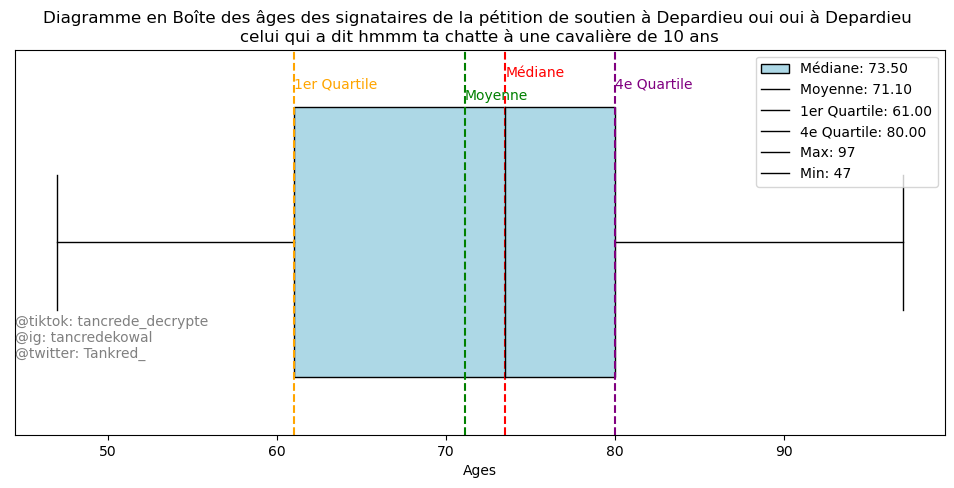

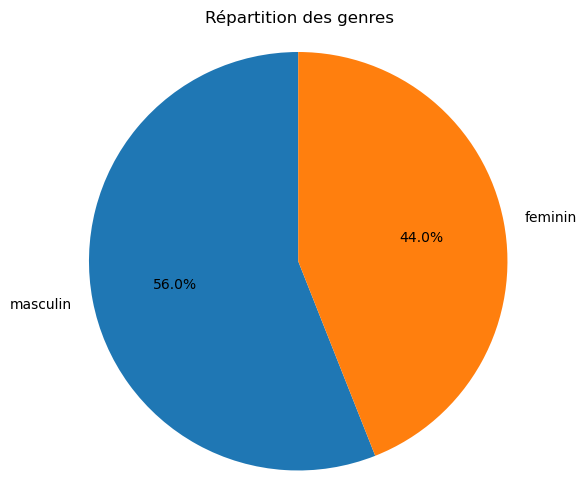

In [56]:
# Calculez les statistiques

mediane = donnees_df["Age"].median()
moyenne = donnees_df["Age"].mean()
q1 = donnees_df["Age"].quantile(0.25)
q4 = donnees_df["Age"].quantile(0.75)

# Affichez le diagramme en boîte
plt.figure(figsize=(12, 5))
box = plt.boxplot(donnees_df["Age"], vert=False, patch_artist=True, widths=0.7)

# Ajoutez des couleurs et des annotations
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box[element], color='black')
    
plt.setp(box['boxes'], facecolor='lightblue')

# Ajoutez les annotations pour les statistiques
plt.axvline(mediane, color='r', linestyle='--')
plt.text(mediane, 1.43, 'Médiane', color='r')

plt.axvline(moyenne, color='g', linestyle='--')
plt.text(moyenne, 1.37, 'Moyenne', color='g')

plt.axvline(q1, color='orange', linestyle='--')
plt.text(q1, 1.4, '1er Quartile', color='orange')

plt.axvline(q4, color='purple', linestyle='--')
plt.text(q4, 1.4, '4e Quartile', color='purple')

# Ajoutez des légendes et des titres
plt.title("Diagramme en Boîte des âges des signataires de la pétition de soutien à Depardieu oui oui à Depardieu \ncelui qui a dit hmmm ta chatte à une cavalière de 10 ans")
plt.xlabel("Ages")
plt.yticks([])  # Pour masquer les y-ticks

plt.text(plt.xlim()[0], plt.ylim()[0]+0.2, '@tiktok: tancrede_decrypte\n@ig: tancredekowal\n@twitter: Tankred_', color='gray', fontsize=10)

text_mediane = f'Médiane: {mediane:.2f}'
text_moyenne = f'Moyenne: {moyenne:.2f}'
text_q1 = f'1er Quartile: {q1:.2f}'
text_q4 = f'4e Quartile: {q4:.2f}'
text_max=f'Max: {max(donnees_df["Age"])}'
text_min=f'Min: {min(donnees_df["Age"])}'
# Créez la légende
plt.legend([text_mediane, text_moyenne, text_q1, text_q4,text_max,text_min], loc='upper right', fontsize=10)

plt.savefig("diagramme_age")

# Affichez le graphique
plt.show()


comptes = donnees_df['Sexe'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(comptes, labels=comptes.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des genres')
plt.axis('equal')  # Assurez-vous que le camembert est circulaire
plt.savefig("pourcentage_genre")
plt.show()